In [ ]:
import pandas as pd

In [ ]:
df2 = pd.read_csv('fix.csv')
df2.head()

,media_foto,media_video,price,original_price,campaign,stock,shop_badge,shop_rating,waktu_proses,Kategori,promo_cashback,promo_diskon,promo_gratis_ongkir,discount,jam_buka,jam_tutup,Top10,terjual
0,2,1,14852,15970,0,915,Power Merchant,4.9,1.0,Snack & Camilan,0,0,0,0.070006,0,24,1,250
1,3,0,77080,94000,1,837,Power Merchant,4.9,3.0,Makanan,1,0,0,0.180000,8,17,1,500
2,2,0,63000,70000,0,849,Power Merchant,4.9,3.0,Makanan,1,0,0,0.100000,8,17,1,250
3,2,0,55000,75000,0,948,Power Merchant,4.9,6.0,Makanan,1,0,0,0.266667,9,16,1,250
4,2,0,55000,75000,0,948,Power Merchant,4.9,6.0,Makanan,1,0,0,0.266667,9,16,0,250


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   media_foto           279 non-null    int64  
 1   media_video          279 non-null    int64  
 2   price                279 non-null    int64  
 3   original_price       279 non-null    int64  
 4   campaign             279 non-null    int64  
 5   stock                279 non-null    int64  
 6   shop_badge           279 non-null    object 
 7   shop_rating          279 non-null    float64
 8   waktu_proses         279 non-null    float64
 9   Kategori             279 non-null    object 
 10  promo_cashback       279 non-null    int64  
 11  promo_diskon         279 non-null    int64  
 12  promo_gratis_ongkir  279 non-null    int64  
 13  discount             279 non-null    float64
 14  jam_buka             279 non-null    int64  
 15  jam_tutup            279 non-null    int

In [ ]:
import pandas as pd
import numpy as np


# fungsi resampling
def bootstrap_resampling_all_columns(data, num_iterations=3):
    num_samples = 279
    bootstrap_samples = []

    for _ in range(num_iterations):
        bootstrap_sample = data.sample(n=num_samples, replace=True)
        bootstrap_samples.append(bootstrap_sample)

    return bootstrap_samples


df2_data = df2.copy()
bootstrap_samples_all_columns = bootstrap_resampling_all_columns(df2_data, num_iterations=3)
df= pd.concat(bootstrap_samples_all_columns, ignore_index=True)

print("Dataset setelah ditambahkan data hasil resampling:")
df.head()


Dataset setelah ditambahkan data hasil resampling:


,media_foto,media_video,price,original_price,campaign,stock,shop_badge,shop_rating,waktu_proses,Kategori,promo_cashback,promo_diskon,promo_gratis_ongkir,discount,jam_buka,jam_tutup,Top10,terjual
0,1,0,155940,259900,0,8,Official Store,4.8,9.0,Busana Wanita,1,0,0,0.400000,9,17,0,250
1,1,0,259900,558000,0,39,Official Store,4.8,7.0,Busana Pria,1,0,0,0.534229,9,17,0,25
2,10,0,107100,119000,1,587,Official Store,4.9,4.0,Perawatan Wajah,1,1,0,0.100000,8,17,0,10000
3,13,0,16000,18300,1,136,Official Store,4.9,8.0,Berbagai Minuman,1,1,1,0.125683,9,17,1,9000
4,1,0,19000,150000,0,99,Official Store,4.8,2.0,Kebutuhan Isi Rumah,1,0,0,0.873333,0,24,1,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   media_foto           837 non-null    int64  
 1   media_video          837 non-null    int64  
 2   price                837 non-null    int64  
 3   original_price       837 non-null    int64  
 4   campaign             837 non-null    int64  
 5   stock                837 non-null    int64  
 6   shop_badge           837 non-null    object 
 7   shop_rating          837 non-null    float64
 8   waktu_proses         837 non-null    float64
 9   Kategori             837 non-null    object 
 10  promo_cashback       837 non-null    int64  
 11  promo_diskon         837 non-null    int64  
 12  promo_gratis_ongkir  837 non-null    int64  
 13  discount             837 non-null    float64
 14  jam_buka             837 non-null    int64  
 15  jam_tutup            837 non-null    int

Deteksi dan Hapus outlier pada variabel y

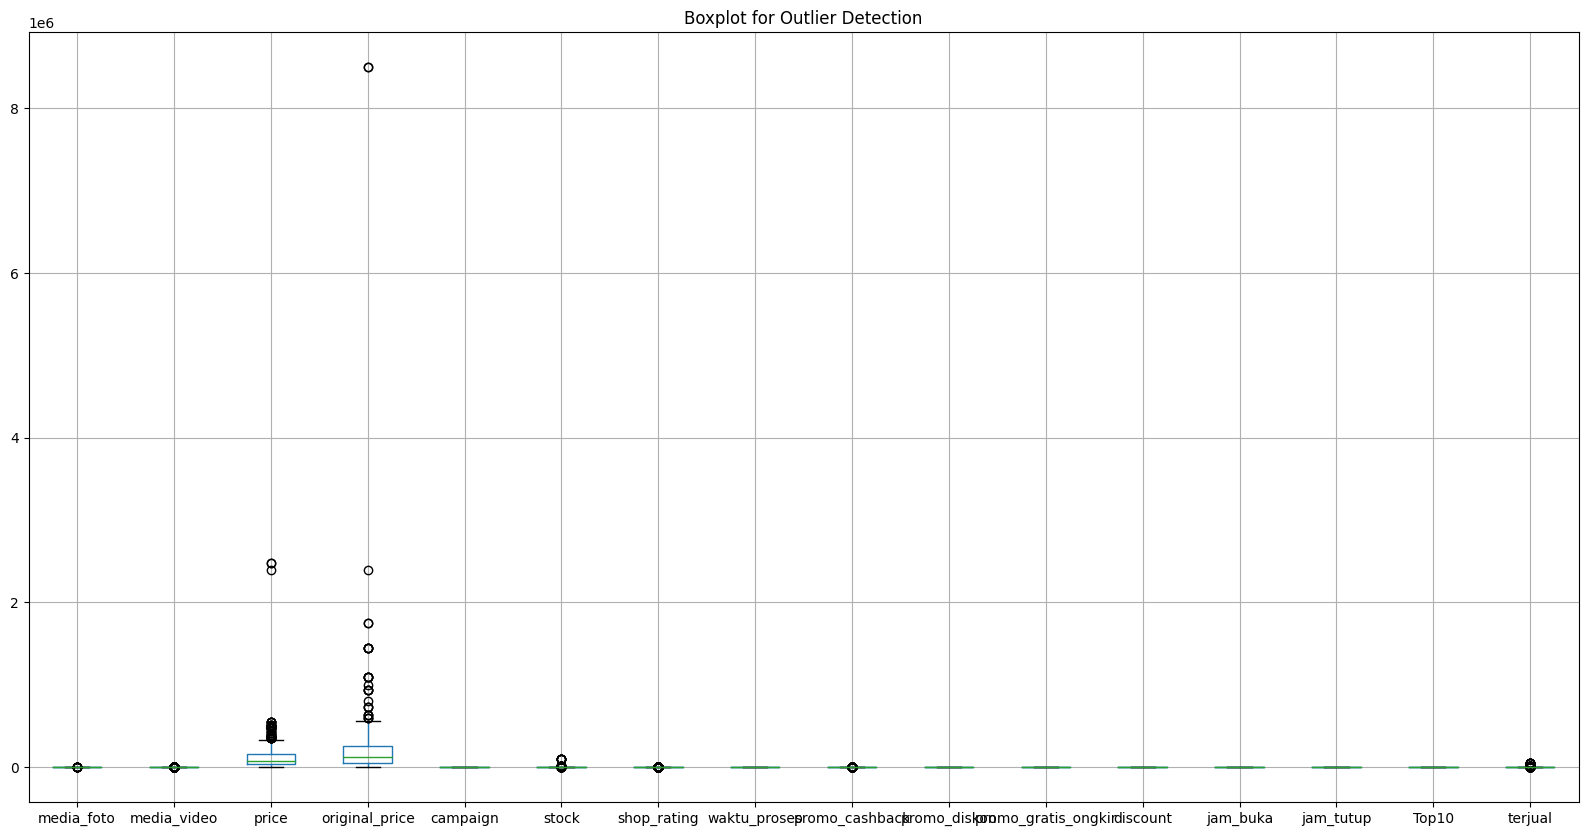

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.boxplot(figsize=(20, 10))
plt.title('Boxplot for Outlier Detection')
plt.show()

In [ ]:
import pandas as pd

kolom_variabel_terjual = 'terjual'

# tentukan iqr
Q1 = df[kolom_variabel_terjual].quantile(0.25)
Q3 = df[kolom_variabel_terjual].quantile(0.75)
IQR = Q3 - Q1

#batas atas dan batas bawah
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

#Filter DataFrame untuk menghapus outlier
df_tanpa_outlier = df[(df[kolom_variabel_terjual] > batas_bawah) & (df[kolom_variabel_terjual] < batas_atas)]

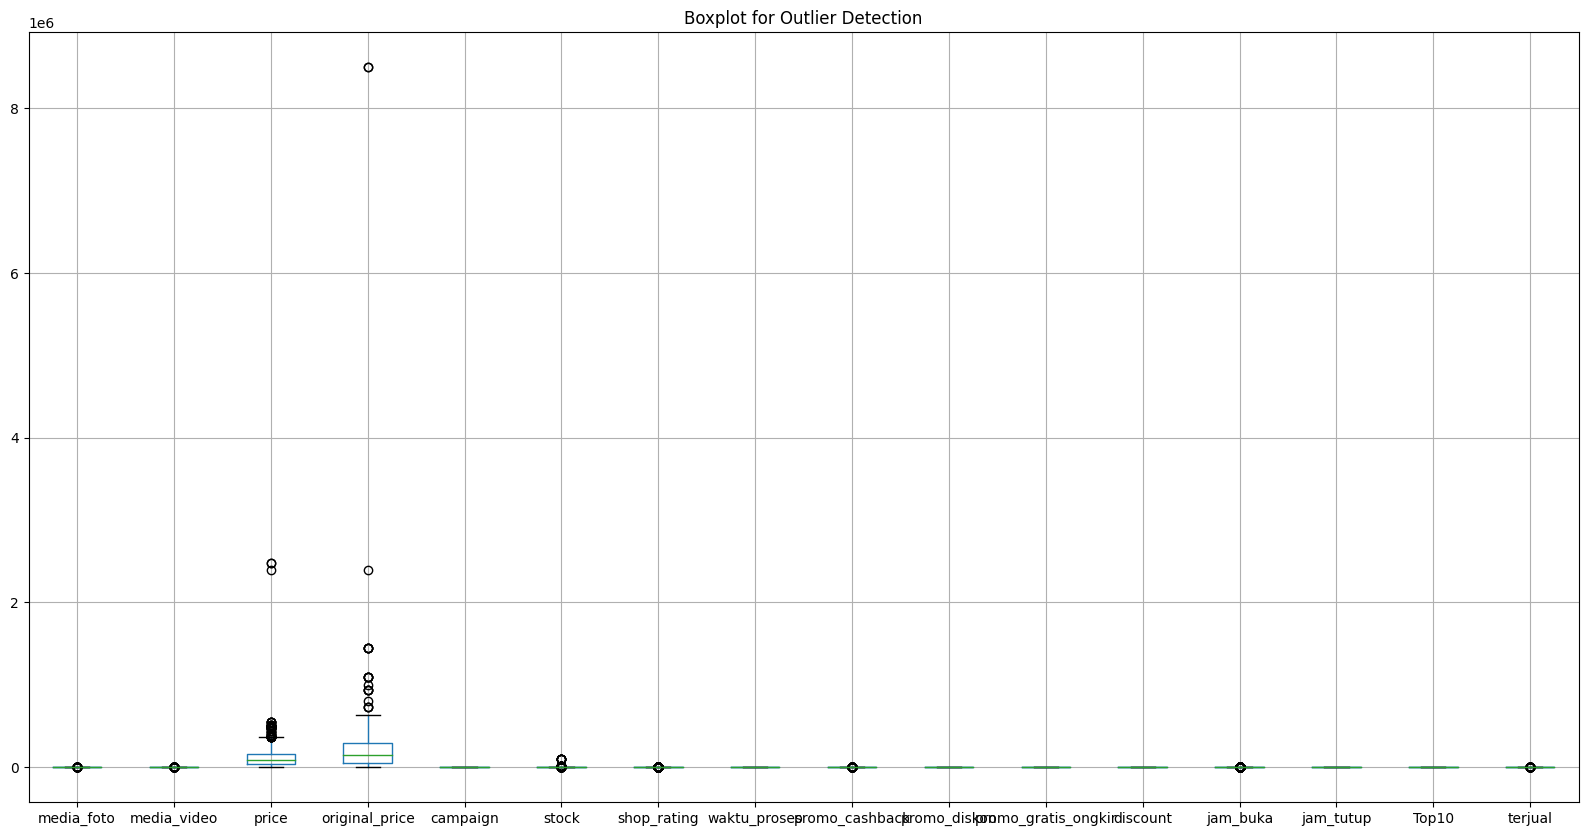

In [ ]:
df_tanpa_outlier.boxplot(figsize=(20, 10))
plt.title('Boxplot for Outlier Detection')
plt.show()

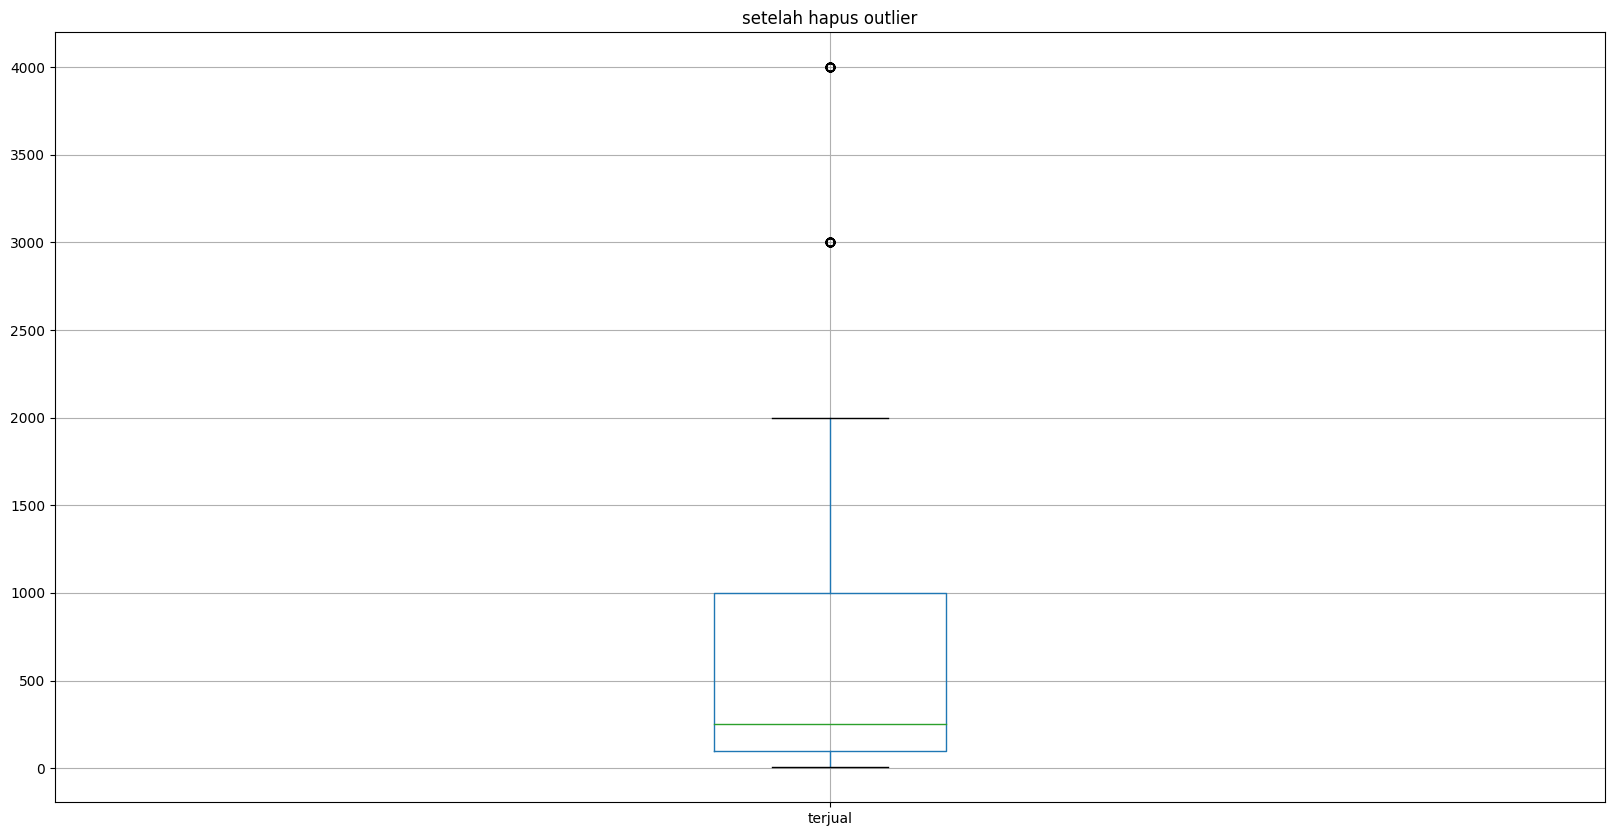

In [ ]:
df_tanpa_outlier[['terjual']].boxplot(figsize=(20, 10))
plt.title('setelah hapus outlier')
plt.show()

In [ ]:
import pandas as pd

kolom_variabel_terjual = 'terjual'

# Hitung IQR
Q1 = df_tanpa_outlier[kolom_variabel_terjual].quantile(0.25)
Q3 = df_tanpa_outlier[kolom_variabel_terjual].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Filter DataFrame untuk menghapus outlier
df_to = df_tanpa_outlier[(df_tanpa_outlier[kolom_variabel_terjual] > batas_bawah) & (df_tanpa_outlier[kolom_variabel_terjual] < batas_atas)]


In [ ]:
import pandas as pd

# Tentukan variabel yang ingin Anda gunakan untuk mengidentifikasi outlier
kolom_variabel_terjual = 'terjual'

# Hitung IQR (Interquartile Range) dari variabel tersebut
Q1 = df_to[kolom_variabel_terjual].quantile(0.25)
Q3 = df_to[kolom_variabel_terjual].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah untuk mengidentifikasi outlier
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Filter DataFrame untuk menghapus outlier
df= df_to[(df_to[kolom_variabel_terjual] > batas_bawah) & (df_to[kolom_variabel_terjual] < batas_atas)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 836
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   media_foto           584 non-null    int64  
 1   media_video          584 non-null    int64  
 2   price                584 non-null    int64  
 3   original_price       584 non-null    int64  
 4   campaign             584 non-null    int64  
 5   stock                584 non-null    int64  
 6   shop_badge           584 non-null    object 
 7   shop_rating          584 non-null    float64
 8   waktu_proses         584 non-null    float64
 9   Kategori             584 non-null    object 
 10  promo_cashback       584 non-null    int64  
 11  promo_diskon         584 non-null    int64  
 12  promo_gratis_ongkir  584 non-null    int64  
 13  discount             584 non-null    float64
 14  jam_buka             584 non-null    int64  
 15  jam_tutup            584 non-null    int

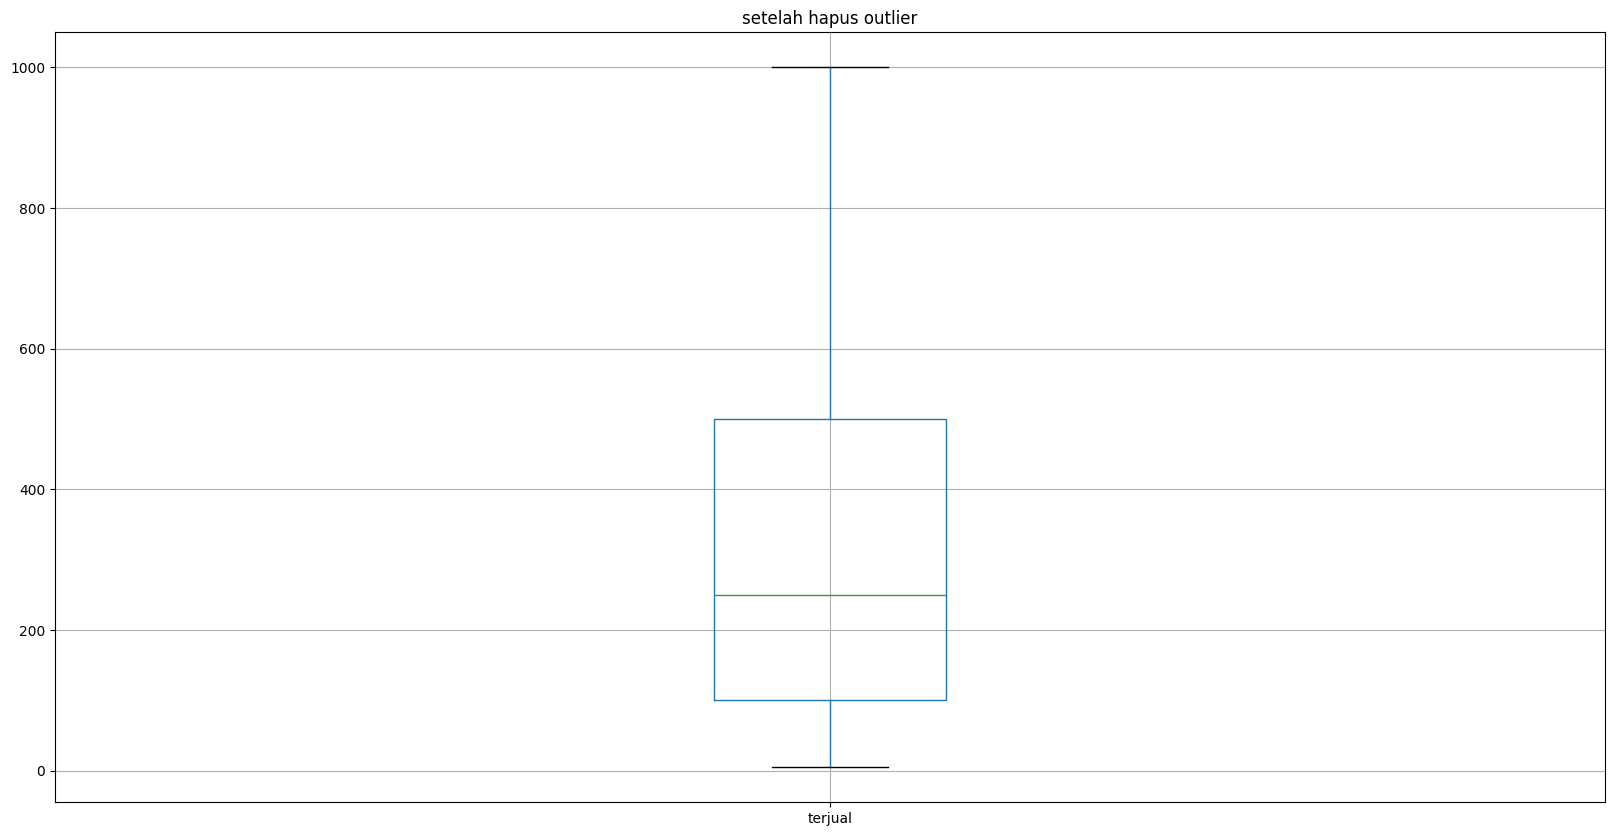

In [ ]:
df[['terjual']].boxplot(figsize=(20, 10))
plt.title('setelah hapus outlier')
plt.show()

Deteksi attribut kategorik

In [ ]:
#kategori attribut
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['shop_badge', 'Kategori']

In [ ]:
cat_col.remove('shop_badge')
cat_col

['Kategori']

Encoding

In [ ]:
df['media_video'] = df['media_video'].astype(int)
df.head()

<ipython-input-16-a5f477b3c428>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['media_video'] = df['media_video'].astype(int)


,media_foto,media_video,price,original_price,campaign,stock,shop_badge,shop_rating,waktu_proses,Kategori,promo_cashback,promo_diskon,promo_gratis_ongkir,discount,jam_buka,jam_tutup,Top10,terjual
0,1,0,155940,259900,0,8,Official Store,4.8,9.00,Busana Wanita,1,0,0,0.400000,9,17,0,250
1,1,0,259900,558000,0,39,Official Store,4.8,7.00,Busana Pria,1,0,0,0.534229,9,17,0,25
4,1,0,19000,150000,0,99,Official Store,4.8,2.00,Kebutuhan Isi Rumah,1,0,0,0.873333,0,24,1,50
5,3,0,144000,180000,0,998,Official Store,5.0,5.00,Perawatan Wajah,1,1,0,0.200000,0,24,0,250
6,3,0,28000,28000,0,810,Official Store,4.8,0.65,Snack & Camilan,0,0,0,0.000000,0,24,0,250


In [ ]:
df_encoded = pd.get_dummies(df['Kategori'], prefix='Kategori')
df = pd.concat([df, df_encoded], axis=1)
df.head()

,media_foto,media_video,price,original_price,campaign,stock,shop_badge,shop_rating,waktu_proses,Kategori,...,Kategori_Dapur,Kategori_Hobi,Kategori_Kebutuhan Bayi,Kategori_Kebutuhan Isi Rumah,Kategori_Makanan,Kategori_Make Up,Kategori_Otomotif,Kategori_Pakaian Olahraga,Kategori_Perawatan Wajah,Kategori_Snack & Camilan
0,1,0,155940,259900,0,8,Official Store,4.8,9.00,Busana Wanita,...,0,0,0,0,0,0,0,0,0,0
1,1,0,259900,558000,0,39,Official Store,4.8,7.00,Busana Pria,...,0,0,0,0,0,0,0,0,0,0
4,1,0,19000,150000,0,99,Official Store,4.8,2.00,Kebutuhan Isi Rumah,...,0,0,0,1,0,0,0,0,0,0
5,3,0,144000,180000,0,998,Official Store,5.0,5.00,Perawatan Wajah,...,0,0,0,0,0,0,0,0,1,0
6,3,0,28000,28000,0,810,Official Store,4.8,0.65,Snack & Camilan,...,0,0,0,0,0,0,0,0,0,1


Data Split

In [ ]:
#split
x= df.drop(columns=['shop_badge', 'Top10', 'terjual', 'Kategori','discount'])
y= df['terjual']


In [ ]:
x.head()

,media_foto,media_video,price,original_price,campaign,stock,shop_rating,waktu_proses,promo_cashback,promo_diskon,...,Kategori_Dapur,Kategori_Hobi,Kategori_Kebutuhan Bayi,Kategori_Kebutuhan Isi Rumah,Kategori_Makanan,Kategori_Make Up,Kategori_Otomotif,Kategori_Pakaian Olahraga,Kategori_Perawatan Wajah,Kategori_Snack & Camilan
0,1,0,155940,259900,0,8,4.8,9.00,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,259900,558000,0,39,4.8,7.00,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,19000,150000,0,99,4.8,2.00,1,0,...,0,0,0,1,0,0,0,0,0,0
5,3,0,144000,180000,0,998,5.0,5.00,1,1,...,0,0,0,0,0,0,0,0,1,0
6,3,0,28000,28000,0,810,4.8,0.65,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y.head()

0    250
1     25
4     50
5    250
6    250
Name: terjual, dtype: int64

## Model Machine Leraning Decission Tree Regressor

In [ ]:
# Import library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import r2_score

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree Regressor
model = DecisionTreeRegressor()

# Latih model dengan data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
predictions = model.predict(X_test)

# Evaluasi model
print('Kebaikan model DC REGRESSOR:')
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Menghitung R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')


Kebaikan model DC REGRESSOR:
Mean Squared Error: 2100.191871620443
R-squared: 0.9783893824436407


## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Inisialisasi model Decision Tree Regressor
model = DecisionTreeRegressor()

# Tentukan distribusi parameter yang akan diuji
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Inisialisasi RandomizedSearchCV dengan model dan parameter distribusi
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, scoring='neg_mean_squared_error', cv=5)

# Lakukan random search pada data latih
random_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Parameter Terbaik:", random_search.best_params_)

# Evaluasi model dengan parameter terbaik pada data uji
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (setelah penyetelan): {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared (setelah penyetelan): {r2}')


Parameter Terbaik: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (setelah penyetelan): 7971.858538287111
R-squared (setelah penyetelan): 0.9179709299839367


In [ ]:
pip install joblib


In [ ]:
from joblib import dump

# Simpan model ke file
model_filename = 'decision_tree_regressor_model.joblib'
dump(best_model, model_filename)

print(f"Model telah disimpan ke {model_filename}")


Model telah disimpan ke decision_tree_regressor_model.joblib


## Mendapatkan 3 Features teratas

In [ ]:
# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort the features based on their importance scores in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top 3 features
top_3_features = sorted_feature_importances[:3]

# Print the top 3 features
print("Top 3 Features:")
for feature, importance in top_3_features:
    print(f"{feature}: {importance}")


Top 3 Features:
media_foto: 0.541693107652364
campaign: 0.15070088685043195
promo_gratis_ongkir: 0.06424156084165701


## Mendapatkan rules dari basemodel

In [ ]:
from sklearn.tree import export_text

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Set the maximum depth to 3
best_model.set_params(max_depth=3)

# Fit the model with the training data
best_model.fit(X_train, y_train)

# Extract rules from the tree
tree_rules = export_text(best_model, feature_names=list(X_train.columns))

# Print the rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)


Decision Tree Rules (Max Depth 3):
|--- media_foto <= 3.50
|   |--- campaign <= 0.50
|   |   |--- Kategori_Pakaian Olahraga <= 0.50
|   |   |   |--- value: [139.53]
|   |   |--- Kategori_Pakaian Olahraga >  0.50
|   |   |   |--- value: [510.42]
|   |--- campaign >  0.50
|   |   |--- promo_diskon <= 0.50
|   |   |   |--- value: [588.71]
|   |   |--- promo_diskon >  0.50
|   |   |   |--- value: [825.00]
|--- media_foto >  3.50
|   |--- media_foto <= 14.00
|   |   |--- stock <= 64.50
|   |   |   |--- value: [707.14]
|   |   |--- stock >  64.50
|   |   |   |--- value: [879.63]
|   |--- media_foto >  14.00
|   |   |--- value: [100.00]



## Mendapatkan rules dari setiap kategori berdasarkan basemodel

In [ ]:
#split
x= df.drop(columns=['shop_badge', 'Top10', 'terjual', 'Kategori','discount'])
y= df['terjual']


## Dapur

In [ ]:
x1 = x[x['Kategori_Dapur'] == 1]
y1 = y[x['Kategori_Dapur'] == 1]

print("Shape of x_filtered:", x1.shape)
print("Shape of y_filtered:", y1.shape)


Shape of x_filtered: (48, 29)
Shape of y_filtered: (48,)


In [ ]:
best_model.fit(x1, y1)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x1))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Decision Tree Rules (Max Depth 3):
|--- campaign <= 0.50
|   |--- shop_rating <= 4.85
|   |   |--- value: [250.00]
|   |--- shop_rating >  4.85
|   |   |--- original_price <= 136750.00
|   |   |   |--- value: [250.00]
|   |   |--- original_price >  136750.00
|   |   |   |--- value: [64.45]
|--- campaign >  0.50
|   |--- media_video <= 0.50
|   |   |--- value: [1000.00]
|   |--- media_video >  0.50
|   |   |--- price <= 300174.50
|   |   |   |--- value: [750.00]
|   |   |--- price >  300174.50
|   |   |   |--- value: [500.00]



## Makanan

In [ ]:
x2 = x[x['Kategori_Makanan'] == 1]
y2 = y[x['Kategori_Makanan'] == 1]

print("Shape of x_filtered:", x2.shape)
print("Shape of y_filtered:", y2.shape)

Shape of x_filtered: (16, 29)
Shape of y_filtered: (16,)


In [ ]:
best_model.fit(x2, y2)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x2))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Decision Tree Rules (Max Depth 3):
|--- campaign <= 0.50
|   |--- value: [250.00]
|--- campaign >  0.50
|   |--- jam_tutup <= 16.00
|   |   |--- value: [1000.00]
|   |--- jam_tutup >  16.00
|   |   |--- value: [500.00]



## Asupan

In [ ]:
x3 = x[x['Kategori_Asupan Ibu & Bayi'] == 1]
y3 = y[x['Kategori_Asupan Ibu & Bayi'] == 1]

print("Shape of x_filtered:", x3.shape)
print("Shape of y_filtered:", y3.shape)


Shape of x_filtered: (45, 29)
Shape of y_filtered: (45,)


In [ ]:
best_model.fit(x3, y3)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x3))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Decision Tree Rules (Max Depth 3):
|--- media_foto <= 3.00
|   |--- waktu_proses <= 4.00
|   |   |--- value: [250.00]
|   |--- waktu_proses >  4.00
|   |   |--- price <= 34425.00
|   |   |   |--- value: [64.00]
|   |   |--- price >  34425.00
|   |   |   |--- value: [100.00]
|--- media_foto >  3.00
|   |--- campaign <= 0.50
|   |   |--- original_price <= 54750.00
|   |   |   |--- value: [500.00]
|   |   |--- original_price >  54750.00
|   |   |   |--- value: [750.00]
|   |--- campaign >  0.50
|   |   |--- value: [1000.00]



## Minuman

In [ ]:
x4 = x[x['Kategori_Berbagai Minuman'] == 1]
y4 = y[x['Kategori_Berbagai Minuman'] == 1]

print("Shape of x_filtered:", x4.shape)
print("Shape of y_filtered:", y4.shape)



best_model.fit(x4, y4)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x4))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (13, 29)
Shape of y_filtered: (13,)
Decision Tree Rules (Max Depth 3):
|--- media_foto <= 3.00
|   |--- jam_buka <= 8.50
|   |   |--- value: [500.00]
|   |--- jam_buka >  8.50
|   |   |--- value: [250.00]
|--- media_foto >  3.00
|   |--- price <= 71400.00
|   |   |--- value: [1000.00]
|   |--- price >  71400.00
|   |   |--- value: [750.00]



## Anak dan Bayi

In [ ]:
x5 = x[x['Kategori_Busana Anak & Bayi'] == 1]
y5 = y[x['Kategori_Busana Anak & Bayi'] == 1]

print("Shape of x_filtered:", x5.shape)
print("Shape of y_filtered:", y5.shape)



best_model.fit(x5, y5)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x5))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (39, 29)
Shape of y_filtered: (39,)
Decision Tree Rules (Max Depth 3):
|--- media_foto <= 4.50
|   |--- campaign <= 0.50
|   |   |--- stock <= 42.50
|   |   |   |--- value: [117.14]
|   |   |--- stock >  42.50
|   |   |   |--- value: [250.00]
|   |--- campaign >  0.50
|   |   |--- value: [500.00]
|--- media_foto >  4.50
|   |--- jam_tutup <= 20.00
|   |   |--- value: [1000.00]
|   |--- jam_tutup >  20.00
|   |   |--- value: [750.00]



## Muslim

In [ ]:
x6 = x[x['Kategori_Busana Muslim'] == 1]
y6 = y[x['Kategori_Busana Muslim'] == 1]

print("Shape of x_filtered:", x6.shape)
print("Shape of y_filtered:", y6.shape)



best_model.fit(x6, y6)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x6))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (54, 29)
Shape of y_filtered: (54,)
Decision Tree Rules (Max Depth 3):
|--- campaign <= 0.50
|   |--- stock <= 39.00
|   |   |--- jam_tutup <= 19.00
|   |   |   |--- value: [47.40]
|   |   |--- jam_tutup >  19.00
|   |   |   |--- value: [250.00]
|   |--- stock >  39.00
|   |   |--- price <= 43500.00
|   |   |   |--- value: [30.00]
|   |   |--- price >  43500.00
|   |   |   |--- value: [222.22]
|--- campaign >  0.50
|   |--- value: [1000.00]



## Pria

In [ ]:
x7 = x[x['Kategori_Busana Pria'] == 1]
y7 = y[x['Kategori_Busana Pria'] == 1]

print("Shape of x_filtered:", x7.shape)
print("Shape of y_filtered:", y7.shape)


best_model.fit(x7, y7)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x7))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (58, 29)
Shape of y_filtered: (58,)
Decision Tree Rules (Max Depth 3):
|--- campaign <= 0.50
|   |--- stock <= 69.00
|   |   |--- stock <= 4.00
|   |   |   |--- value: [250.00]
|   |   |--- stock >  4.00
|   |   |   |--- value: [49.21]
|   |--- stock >  69.00
|   |   |--- price <= 152450.00
|   |   |   |--- value: [127.14]
|   |   |--- price >  152450.00
|   |   |   |--- value: [250.00]
|--- campaign >  0.50
|   |--- value: [500.00]



## Wanita

In [ ]:
x8= x[x['Kategori_Busana Wanita'] == 1]
y8 = y[x['Kategori_Busana Wanita'] == 1]

print("Shape of x_filtered:", x8.shape)
print("Shape of y_filtered:", y8.shape)


best_model.fit(x8, y8)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x8))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (53, 29)
Shape of y_filtered: (53,)
Decision Tree Rules (Max Depth 3):
|--- promo_gratis_ongkir <= 0.50
|   |--- promo_diskon <= 0.50
|   |   |--- waktu_proses <= 6.00
|   |   |   |--- value: [25.67]
|   |   |--- waktu_proses >  6.00
|   |   |   |--- value: [103.85]
|   |--- promo_diskon >  0.50
|   |   |--- original_price <= 184000.00
|   |   |   |--- value: [250.00]
|   |   |--- original_price >  184000.00
|   |   |   |--- value: [120.91]
|--- promo_gratis_ongkir >  0.50
|   |--- campaign <= 0.50
|   |   |--- value: [1000.00]
|   |--- campaign >  0.50
|   |   |--- value: [500.00]



### Hobi

In [ ]:
x9 = x[x['Kategori_Hobi'] == 1]
y9 = y[x['Kategori_Hobi'] == 1]

print("Shape of x_filtered:", x9.shape)
print("Shape of y_filtered:", y9.shape)

best_model.fit(x9, y9)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x9))

# Print the rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (8, 29)
Shape of y_filtered: (8,)
Decision Tree Rules (Max Depth 3):
|--- value: [100.00]



## Kebutuhan Bayi

In [ ]:
x10 = x[x['Kategori_Kebutuhan Bayi'] == 1]
y10= y[x['Kategori_Kebutuhan Bayi'] == 1]

print("Shape of x_filtered:", x10.shape)
print("Shape of y_filtered:", y10.shape)


best_model.fit(x10, y10)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x10))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (28, 29)
Shape of y_filtered: (28,)
Decision Tree Rules (Max Depth 3):
|--- campaign <= 0.50
|   |--- stock <= 741.00
|   |   |--- original_price <= 36350.00
|   |   |   |--- value: [60.00]
|   |   |--- original_price >  36350.00
|   |   |   |--- value: [112.73]
|   |--- stock >  741.00
|   |   |--- value: [250.00]
|--- campaign >  0.50
|   |--- media_video <= 0.50
|   |   |--- value: [1000.00]
|   |--- media_video >  0.50
|   |   |--- value: [750.00]



## Isi Rumah

In [ ]:
x11 = x[x['Kategori_Kebutuhan Isi Rumah'] == 1]
y11= y[x['Kategori_Kebutuhan Isi Rumah'] == 1]

print("Shape of x_filtered:", x11.shape)
print("Shape of y_filtered:", y11.shape)

best_model.fit(x11, y11)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x11))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (53, 29)
Shape of y_filtered: (53,)
Decision Tree Rules (Max Depth 3):
|--- promo_gratis_ongkir <= 0.50
|   |--- campaign <= 0.50
|   |   |--- jam_tutup <= 21.00
|   |   |   |--- value: [217.86]
|   |   |--- jam_tutup >  21.00
|   |   |   |--- value: [35.71]
|   |--- campaign >  0.50
|   |   |--- value: [500.00]
|--- promo_gratis_ongkir >  0.50
|   |--- original_price <= 1087500.00
|   |   |--- stock <= 96.50
|   |   |   |--- value: [750.00]
|   |   |--- stock >  96.50
|   |   |   |--- value: [1000.00]
|   |--- original_price >  1087500.00
|   |   |--- value: [500.00]



## Make up

In [ ]:
x12 = x[x['Kategori_Make Up'] == 1]
y12 = y[x['Kategori_Make Up'] == 1]

print("Shape of x_filtered:", x12.shape)
print("Shape of y_filtered:", y12.shape)


best_model.fit(x12, y12)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x12))

# Print the rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (23, 29)
Shape of y_filtered: (23,)
Decision Tree Rules (Max Depth 3):
|--- media_foto <= 4.00
|   |--- waktu_proses <= 5.00
|   |   |--- value: [250.00]
|   |--- waktu_proses >  5.00
|   |   |--- value: [500.00]
|--- media_foto >  4.00
|   |--- jam_tutup <= 20.50
|   |   |--- value: [750.00]
|   |--- jam_tutup >  20.50
|   |   |--- value: [1000.00]



## Otomotif

In [ ]:
x13 = x[x['Kategori_Otomotif'] == 1]
y13 = y[x['Kategori_Otomotif'] == 1]

print("Shape of x_filtered:", x13.shape)
print("Shape of y_filtered:", y13.shape)


best_model.fit(x13, y13)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x13))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (39, 29)
Shape of y_filtered: (39,)
Decision Tree Rules (Max Depth 3):
|--- promo_gratis_ongkir <= 0.50
|   |--- price <= 482500.00
|   |   |--- media_foto <= 1.50
|   |   |   |--- value: [250.00]
|   |   |--- media_foto >  1.50
|   |   |   |--- value: [61.52]
|   |--- price >  482500.00
|   |   |--- value: [5.00]
|--- promo_gratis_ongkir >  0.50
|   |--- value: [1000.00]



## Pakaian Olahraga

In [ ]:
x14 = x[x['Kategori_Pakaian Olahraga'] == 1]
y14 = y[x['Kategori_Pakaian Olahraga'] == 1]

print("Shape of x_filtered:", x14.shape)
print("Shape of y_filtered:", y14.shape)


best_model.fit(x14, y14)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x14))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (41, 29)
Shape of y_filtered: (41,)
Decision Tree Rules (Max Depth 3):
|--- stock <= 218.50
|   |--- waktu_proses <= 5.50
|   |   |--- jam_buka <= 8.50
|   |   |   |--- value: [66.67]
|   |   |--- jam_buka >  8.50
|   |   |   |--- value: [613.64]
|   |--- waktu_proses >  5.50
|   |   |--- campaign <= 0.50
|   |   |   |--- value: [108.33]
|   |   |--- campaign >  0.50
|   |   |   |--- value: [500.00]
|--- stock >  218.50
|   |--- value: [1000.00]



## Perawatan Wajah

In [ ]:
x15 = x[x['Kategori_Perawatan Wajah'] == 1]
y15 = y[x['Kategori_Perawatan Wajah'] == 1]

print("Shape of x_filtered:", x15.shape)
print("Shape of y_filtered:", y15.shape)


best_model.fit(x15, y15)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x15))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (35, 29)
Shape of y_filtered: (35,)
Decision Tree Rules (Max Depth 3):
|--- jam_tutup <= 17.50
|   |--- stock <= 56.00
|   |   |--- value: [500.00]
|   |--- stock >  56.00
|   |   |--- stock <= 675.00
|   |   |   |--- value: [1000.00]
|   |   |--- stock >  675.00
|   |   |   |--- value: [750.00]
|--- jam_tutup >  17.50
|   |--- promo_gratis_ongkir <= 0.50
|   |   |--- value: [250.00]
|   |--- promo_gratis_ongkir >  0.50
|   |   |--- value: [500.00]



## Snack n Camilan

In [ ]:
x16 = x[x['Kategori_Snack & Camilan'] == 1]
y16 = y[x['Kategori_Snack & Camilan'] == 1]

print("Shape of x_filtered:", x16.shape)
print("Shape of y_filtered:", y16.shape)


best_model.fit(x16, y16)

# Extract rules
tree_rules = export_text(best_model, feature_names=list(x16))

# Print rules
print("Decision Tree Rules (Max Depth 3):")
print(tree_rules)

Shape of x_filtered: (47, 29)
Shape of y_filtered: (47,)
Decision Tree Rules (Max Depth 3):
|--- media_foto <= 3.50
|   |--- original_price <= 10965.00
|   |   |--- value: [500.00]
|   |--- original_price >  10965.00
|   |   |--- campaign <= 0.50
|   |   |   |--- value: [235.00]
|   |   |--- campaign >  0.50
|   |   |   |--- value: [500.00]
|--- media_foto >  3.50
|   |--- original_price <= 30525.00
|   |   |--- media_foto <= 5.50
|   |   |   |--- value: [1000.00]
|   |   |--- media_foto >  5.50
|   |   |   |--- value: [750.00]
|   |--- original_price >  30525.00
|   |   |--- value: [100.00]

